In [ ]:
%load_ext autoreload
%autoreload 2


import sys
sys.path.append('..')
from settings import *
from fermiqp.lattice import *
import matplotlib.colors as colors

from fermiqp_style import set_theme
set_theme()


In [5]:
## Definintion of Lithiums parameters
## NEED TO GET THE VALUES FROM DOMINIK!!

# interference angle (determined by lattice spacing)
half_angle = 5.05 #in degrees

# long lattice
power_ir_tot = 2 #W
wvl_ir = 1064e-9
waist_vert_ir = 200e-6
waist_hor_ir = 200e-6
UIr = power2freq(power=power_ir_tot, waist=waist_vert_ir, waisty=waist_hor_ir)

# short lattice
power_gr_tot = 4 #W
wvl_gr = 532e-9
waist_vert_gr = 100e-6
waist_hor_gr = 200e-6
UGr = power2freq(power=power_gr_tot, waist=waist_vert_gr, waisty=waist_hor_gr)

long_lattice_lithium = OpticalLatticeAngle(waist_vert_ir,waist_hor_ir,half_angle,power_ir_tot/2,wvl_ir)
short_lattice_lithium = OpticalLatticeAngle(waist_vert_gr,waist_hor_gr,half_angle,power_gr_tot/2,wvl_gr)

print("Long lattice summary:")
long_lattice_lithium.print_params()

print("\nShort lattice summary:")

short_lattice_lithium.print_params()

Long lattice summary:
Power per beam: 1.0 W
Waists: 200.000, 200.000 um
Lattice spacing: 6.044 um
Recoil energy: 226.436 Hz
Depth: 80.219 kHz, 354.267 Er, 3.854 uK
On site: 8.524 kHz, 0.410 uK

Short lattice summary:
Power per beam: 2.0 W
Waists: 100.000, 200.000 um
Lattice spacing: 3.022 um
Recoil energy: 905.743 Hz
Depth: -327.179 kHz, -361.227 Er, -15.719 uK
On site: 34.429 kHz, 1.654 uK


In [111]:
UIr/long_lattice_lithium.Er

722.7382358615538

In [27]:
def Pcr(Aeff,gb,L,alpha):
    Leff = (1-np.exp(-alpha*L))/alpha
    return 21*Aeff/(gb*Leff)

(0.0, 135.0)

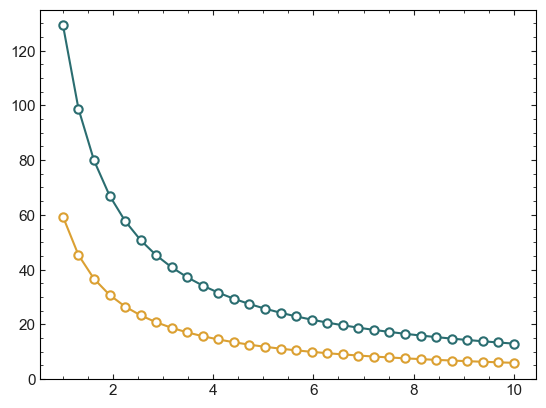

In [46]:
loss_coeff_db = 2.5/1000 #db per m
loss_coeff_lin = loss_coeff_db/4.343
gain_br = 2.4e-6 #brioullin gain in m/W
gain_br = 1e-11
mfd = 12.4e-6/1.4

L = np.linspace(1,10,30)
plt.plot(L,Pcr(np.pi*mfd**2/4,gain_br,L,loss_coeff_lin))
mfd = 8.4e-6/1.4
plt.plot(L,Pcr(np.pi*mfd**2/4,gain_br,L,loss_coeff_lin))
plt.ylim(0,135)

In [21]:
10**-(2.5/1000)

0.9942600739529567

# Benchmarking Lithium's parameters

In order to validate our code we are comparing Lithiums parameters to ensure consistency. 

In [29]:
## Definintion of Lithiums parameters
## NEED TO GET THE VALUES FROM DOMINIK!!

# interference angle (determined by lattice spacing)
half_angle = 13.37 #in degrees

# long lattice  
power_ir_tot = 6 #W
wvl_ir = 1064e-9
waist_vert_ir = 350e-6
waist_hor_ir = 350e-6
UIr = power2freq(power=power_ir_tot, 
                 waist=waist_hor_ir, 
                 waisty=waist_vert_ir,
                 wavelen=power_ir_tot/2)

# short lattice
power_gr_tot = 6 #W
wvl_gr = 532e-9
waist_vert_gr = 110e-6
waist_hor_gr = 110e-6
UGr = power2freq(power=power_gr_tot, 
                 waist=waist_hor_gr, 
                 waisty=waist_vert_gr,
                 wavelen=power_gr_tot/2)

long_lattice_lithium = OpticalLatticeAngle(waist_hor_ir,
                                           waist_vert_ir,
                                           half_angle,
                                           power_ir_tot/2,
                                           wvl_ir)
short_lattice_lithium = OpticalLatticeAngle(waist_vert_gr,
                                            waist_hor_gr,
                                            half_angle,
                                            power_gr_tot/2,
                                            wvl_gr)

print("Long lattice summary:")
long_lattice_lithium.print_params()

print(long_lattice_lithium.t()/long_lattice_lithium.Er)
print(long_lattice_lithium.t())

print("\nShort lattice summary:")

short_lattice_lithium.print_params()

print(short_lattice_lithium.t()/short_lattice_lithium.Er)
print(short_lattice_lithium.t())


Long lattice summary:
Power per beam: 3.0 W
Waists: 350.000, 350.000 um
Lattice spacing: 2.301 um
Recoil energy: 1562.618 Hz
Depth: 78.582 kHz, 50.288 Er, 3.775 uK
On site: 22.162 kHz, 1.065 uK
2.9515273803804636e-05
0.04612111117371027

Short lattice summary:
Power per beam: 3.0 W
Waists: 110.000, 110.000 um
Lattice spacing: 1.150 um
Recoil energy: 6250.474 Hz
Depth: -811.188 kHz, -129.780 Er, -38.972 uK
On site: 142.412 kHz, 6.842 uK
1.1049137684804619e-08
6.906234526868136e-05


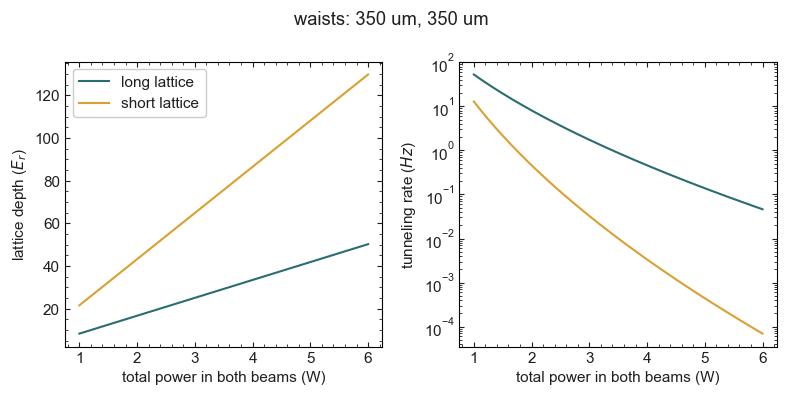

In [6]:
power = np.linspace(1,6,300)
long_lattice_plot = OpticalLatticeAngle(waist_vert_ir,waist_hor_ir,half_angle,power/2,wvl_ir)
short_lattice_plot= OpticalLatticeAngle(waist_vert_gr,waist_hor_gr,half_angle,power/2,wvl_gr)
                                        
fig, axs =plt.subplots(1,2,figsize=(8,4))
axs[0].plot(power,long_lattice_plot.U/long_lattice_plot.Er,marker='', label='long lattice')
axs[0].plot(power,abs(short_lattice_plot.U)/short_lattice_plot.Er,marker='',label='short lattice')

plt.suptitle("waists: %d um, %d um "  %(long_lattice_plot.waist*1e6,long_lattice_plot.waisty*1e6))
# plt.axvline(6,label='Li parameters',marker='',linestyle='--')
axs[0].legend()
axs[0].set_xlabel('total power in both beams (W)')
axs[0].set_ylabel('lattice depth ($E_r$)')
axs[0].legend()

axs[1].semilogy(power,long_lattice_plot.t(),marker='', label='long lattice')
axs[1].semilogy(power,short_lattice_plot.t(),marker='',label='short lattice')
axs[1].set_xlabel('total power in both beams (W)')
axs[1].set_ylabel('tunneling rate ($Hz$)')
fig.tight_layout()

In [3]:
long_lattice_plot = OpticalLatticeAngle(waist_vert_ir,waist_hor_ir,half_angle,6/2,wvl_ir)
long_lattice_plot.print_params()

Power per beam: 3.0 W
Waists: 350.000, 350.000 um
Lattice spacing: 2.301 um
Recoil energy: 1562.618 Hz
Depth: 78.582 kHz, 50.288 Er, 3.775 uK
On site: 22.162 kHz, 1.065 uK


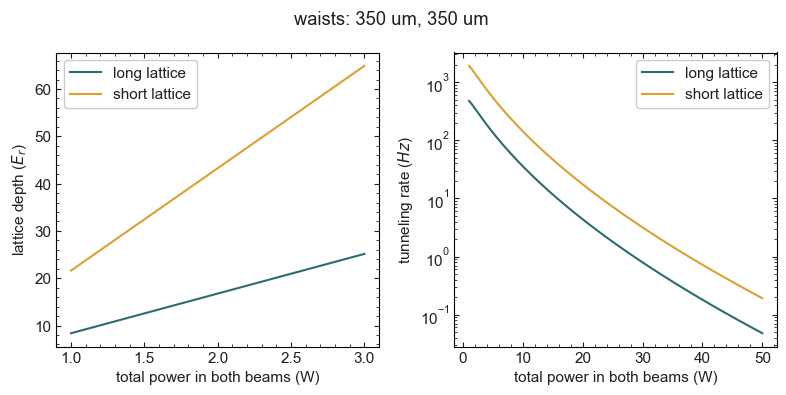

In [19]:
power = np.linspace(1,3,300)
depth_in_recoils = np.linspace(1,50,300)
long_lattice_plot = OpticalLatticeAngle(waist_vert_ir,waist_hor_ir,half_angle,power/2,wvl_ir)
short_lattice_plot= OpticalLatticeAngle(waist_vert_gr,waist_hor_gr,half_angle,power/2,wvl_gr)
                                        
fig, axs =plt.subplots(1,2,figsize=(8,4))
axs[0].plot(power,long_lattice_plot.U/long_lattice_plot.Er,marker='', label='long lattice')
axs[0].plot(power,abs(short_lattice_plot.U)/short_lattice_plot.Er,marker='',label='short lattice')

plt.suptitle("waists: %d um, %d um "  %(long_lattice_plot.waist*1e6,long_lattice_plot.waisty*1e6))
# plt.axvline(6,label='Li parameters',marker='',linestyle='--')
axs[0].legend()
axs[0].set_xlabel('total power in both beams (W)')
axs[0].set_ylabel('lattice depth ($E_r$)')
axs[0].legend()

axs[1].semilogy(depth_in_recoils,long_lattice_lithium.t(U=depth_in_recoils*long_lattice_lithium.Er),marker='', label='long lattice')
axs[1].semilogy(depth_in_recoils,short_lattice_lithium.t(U=depth_in_recoils*short_lattice_lithium.Er),marker='', label='short lattice')
axs[1].set_xlabel('total power in both beams (W)')
axs[1].set_ylabel('tunneling rate ($Hz$)')
axs[1].legend()

fig.tight_layout()

# Calculations for x and y superlattices

In [71]:
## Definintion of target parameters

# interference angle (determined by lattice spacing)
half_angle = 14 #in degrees

# long lattice
power_ir_tot = 6 #W
wvl_ir = 1064e-9
waist_vert_ir = 100e-6
waist_hor_ir = 200e-6
UIr = power2freq(power=powerIr, waist=waistz, waisty=waistxy)

# short lattice
power_gr_tot = 6 #W
wvl_gr = 532e-9
waist_vert_gr = 100e-6
waist_hor_gr = 200e-6
UGr = power2freq(power=powerIr, waist=waistz, waisty=waistxy)

long_lattice = OpticalLatticeAngle(waist_vert_ir,waist_hor_ir,half_angle,power_ir_tot/2,wvl_ir)
short_lattice = OpticalLatticeAngle(waist_vert_gr,waist_hor_gr,half_angle,power_gr_tot/2,wvl_gr)

print("Long lattice summary:")
long_lattice.print_params()

print("\nShort lattice summary:")

short_lattice.print_params()

Long lattice summary:
Power per beam: 3.0 W
Waists: 100.000, 200.000 um
Lattice spacing: 2.199 um
Recoil energy: 1710.342 Hz
Depth: 481.312 kHz, 281.413 Er, 23.124 uK
On site: 57.383 kHz, 2.757 uK

Short lattice summary:
Power per beam: 3.0 W
Waists: 100.000, 200.000 um
Lattice spacing: 1.100 um
Recoil energy: 6841.367 Hz
Depth: -490.769 kHz, -71.735 Er, -23.578 uK
On site: 115.888 kHz, 5.568 uK


## depth versus power

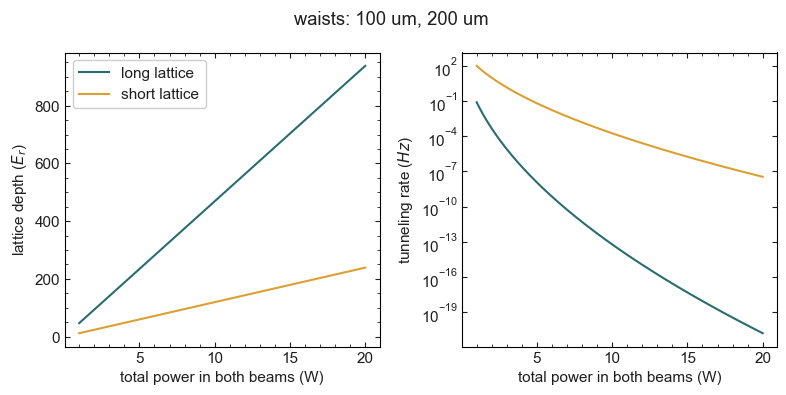

In [91]:
power = np.linspace(1,20,300)
long_lattice_plot = OpticalLatticeAngle(waist_vert_ir,waist_hor_ir,half_angle,power/2,wvl_ir)
short_lattice_plot= OpticalLatticeAngle(waist_vert_gr,waist_hor_gr,half_angle,power/2,wvl_gr)
                                        
fig, axs =plt.subplots(1,2,figsize=(8,4))
axs[0].plot(power,long_lattice_plot.U/long_lattice_plot.Er,marker='', label='long lattice')
axs[0].plot(power,abs(short_lattice_plot.U)/short_lattice_plot.Er,marker='',label='short lattice')

plt.suptitle("waists: %d um, %d um "  %(long_lattice_plot.waist*1e6,long_lattice_plot.waisty*1e6))
# plt.axvline(6,label='Li parameters',marker='',linestyle='--')
axs[0].legend()
axs[0].set_xlabel('total power in both beams (W)')
axs[0].set_ylabel('lattice depth ($E_r$)')
axs[0].legend()

axs[1].semilogy(power,long_lattice_plot.t(),marker='', label='long lattice')
axs[1].semilogy(power,short_lattice_plot.t(),marker='',label='short lattice')
axs[1].set_xlabel('total power in both beams (W)')
axs[1].set_ylabel('tunneling rate ($Hz$)')
fig.tight_layout()



## How much power for 30 Er in long lattice?

In [44]:
long_lattice_test = OpticalLatticeAngle(350e-6,350e-6,half_angle,2
                                        
                                        ,1064e-9)
long_lattice_test.print_params()
long_lattice_test.t()


Power per beam: 2.0 W
Waists: 350.000, 350.000 um
Lattice spacing: 2.301 um
Recoil energy: 1562.618 Hz
Depth: 52.388 kHz, 33.526 Er, 2.517 uK
On site: 18.096 kHz, 0.869 uK


0.45933316429943805

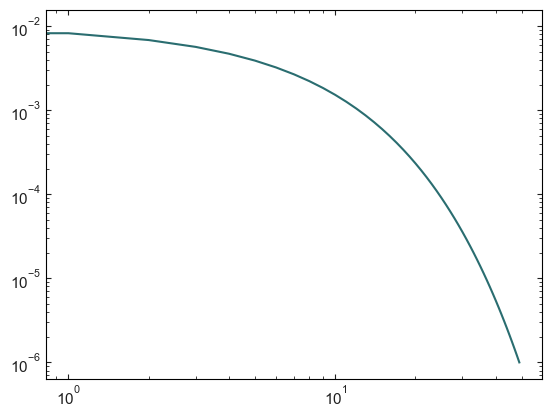

In [50]:
tunneling_rate = np.logspace(1,-3)
plt.loglog(1-np.exp(-tunneling_rate/1e3),'-')
plt.xlabel('')